<a href="https://colab.research.google.com/github/AnnaPaulaFigueiredo/Imersao-Dados-Alura/blob/main/Dia2Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)


Desafio 3: Criar uma função para plotar o boxplot do seaborn.

In [ ]:
def boxPlotSns(title, valueX, valueY, data, order):

  plt.figure(figsize=(10,6))
  plt.title(title)
  
  sns.boxplot(x =valueX, y =valueY, data =data, order=order, palette="Set2")


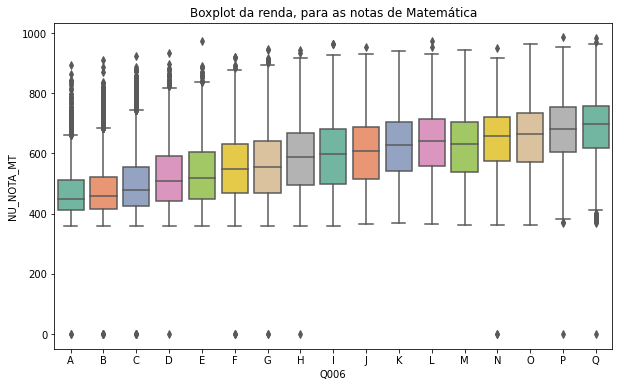

In [ ]:
# Fazer Boxplot da Renda, e as notas de Matemática

renda = "Q006"
notas = "NU_NOTA_MT"
title = "Boxplot da renda, para as notas de Matemática"

# Ordenação do eixo x
order = dados["Q006"].unique()
order.sort()

boxPlotSns(title, renda, notas, data, order)

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente.

In [ ]:
# Criando uma nova coluna, a de NU_NOTA_TOTAL, para representar a nota total dos Alunos
# Filtando pelas provas
exame = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

data["NU_NOTA_TOTAL"] = data[exame].sum(axis=1)

In [ ]:
# Filtrar o dataset para as notas totais igual a 0
zeros = data.query("NU_NOTA_TOTAL == 0")
zeros

# Consultas para filtrar as colunas de presença
presence = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]

# Agora do dataset zerados, queremos saber se eles foram FALTANTES ou ELIMINADOS
zeros[presence].value_counts()


# Podemos observar que a grande maioria que tirou zero, não compareceu

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 28998
                2               2               0                   120
                1               1               0                    39
1               0               0               1                     3
                1               1               1                     2
dtype: int64

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

In [ ]:
# De acordo com o dicionário dos dados, a pessoa que é eliminada, ela tem como registro em presença, o valor 2
# Aproveitando a análise anterior, onde só existem pessoas elimidas para as provas de CN e CH
zerados.query("TP_PRESENCA_CH == 2").head()

# Com essa análise já vem a confirmação de que as notas são registradas como  0.0

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
77,190001007653,2019,1503903,Juruti,15,PA,22,F,1,3,1,1503903.0,Juruti,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,D,B,B,2,B,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,E,A,C,A,0.0
396,190001019972,2019,1500800,Ananindeua,15,PA,17,F,0,1,1,1500800.0,Ananindeua,15.0,PA,2,0,2,1.0,0,15520560.0,1500800.0,Ananindeua,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,C,B,5,D,A,B,C,A,A,B,A,B,A,A,A,A,C,A,A,D,A,A,A,0.0
446,190001021386,2019,1500602,Altamira,15,PA,35,F,0,3,1,1500602.0,Altamira,15.0,PA,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,B,0.0
609,190001027857,2019,1100205,Porto Velho,11,RO,32,F,1,3,1,1100205.0,Porto Velho,11.0,RO,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,B,A,B,C,A,A,B,A,B,B,A,A,A,C,B,A,B,A,B,A,0.0
728,190001032370,2019,1302603,Manaus,13,AM,18,F,1,3,2,NaN,NaN,NaN,NaN,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B,0.0


In [ ]:
# Vamos remover do dataset original onde os registros atendem a condição de NU_NOTA_TOTAL == 0
index = data.query("NU_NOTA_TOTAL == 0").index
data = data.drop(index)

Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

In [ ]:
# Separando a base entre treineiros e não treineiros
trainers = data.query("IN_TREINEIRO == 1")
notTrainers = data.query("IN_TREINEIRO == 0")

# Salvando TREINEIROS em um novo dataframe para facilitar ordenação e criação de gráficos
trainers = pd.DataFrame(trainers["Q006"].value_counts(normalize=True))

trainers = trainers.sort_index()
trainers["Q006"] = trainers["Q006"] * 100

# Salvando  NÃO TREINEIROS em um novo dataframe para facilitar ordenação e criação de gráficos
notTrainers = pd.DataFrame(notTrainers["Q006"].value_counts(normalize=True))

notTrainers = notTrainers.sort_index()
notTrainers["Q006"] = notTrainers["Q006"] * 100

In [ ]:
# Gerando um gráfico comparativo dessas proporções
# O dataframe tem como index, a categoria de renda, e como value, a porcentagem

fig = go.Figure(data=[
    go.Bar(name='Treineiros', x=trainers.index, y=trainers["Q006"],  marker_color='indianred'),
    go.Bar(name='Não Treineiros', x=notTrainers.index, y=notTrainers["Q006"],  marker_color='lightsalmon')])


fig.update_layout(barmode='group', title_text='Comparativo das Categorias de Renda entre Treineiros e Não Treineiros')
fig.show()

Desafio 7: Fazer o mesmo boxplot (hue), olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [ ]:
# A não possui, B possui
x0 = data.query("Q025 == 'A'")["NU_NOTA_TOTAL"].values
x1 = data.query("Q025 == 'B'")["NU_NOTA_TOTAL"].values

fig = go.Figure()

fig.add_trace(go.Box(y=x0, name="Não Possui Internet", marker_color = 'indianred'))
fig.add_trace(go.Box(y=x1, name="Possui Internet", marker_color = 'lightseagreen'))

fig.show()